In [3]:
# ============================================
# STEP 1: IMPORT REQUIRED LIBRARIES
# ============================================
# As a data analyst, always start by importing
# only what you need. This keeps projects clean
# and avoids unnecessary dependencies.

import pandas as pd          # For data manipulation
import numpy as np           # For numerical operations
import matplotlib.pyplot as plt  # For plotting charts

# Improve default plot appearance
plt.style.use('default')

# ============================================
# STEP 2: LOAD DATASET
# ============================================
# Load CSV file into a pandas DataFrame.
# A DataFrame is like an Excel sheet in Python.

df = pd.read_csv("sales_data.csv")

# Display first 5 rows to verify data loaded correctly
df.head()



,OrderID,Date,Product,Category,Region,Quantity,Price,Revenue
0,1001,2024-10-08,Phone,Electronics,Arusha,1,450000,450000
1,1002,2024-04-14,TV,Electronics,Morogoro,3,950000,2850000
2,1003,2025-08-27,Printer,Electronics,Mbeya,2,250000,500000
3,1004,2024-04-05,Laptop,Electronics,Arusha,1,850000,850000
4,1005,2025-09-08,TV,Electronics,Dar,9,950000,8550000


In [4]:
# ============================================
# STEP 3: DATA OVERVIEW
# ============================================
# Understand structure, data types, and quality
# before doing any analysis.

# Check column names, data types, and null values
df.info()

# Check how many missing values exist per column
df.isnull().sum()

# Generate statistical summary for numeric columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   OrderID   200 non-null    int64 
 1   Date      200 non-null    object
 2   Product   200 non-null    object
 3   Category  200 non-null    object
 4   Region    200 non-null    object
 5   Quantity  200 non-null    int64 
 6   Price     200 non-null    int64 
 7   Revenue   200 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 12.6+ KB


,OrderID,Quantity,Price,Revenue
count,200.000000,200.000000,200.00000,2.000000e+02
mean,1100.500000,5.455000,413100.00000,2.245900e+06
std,57.879185,2.817386,292286.75601,2.121595e+06
min,1001.000000,1.000000,60000.00000,6.000000e+04
25%,1050.750000,3.000000,120000.00000,6.300000e+05
50%,1100.500000,5.000000,320000.00000,1.700000e+06
75%,1150.250000,8.000000,550000.00000,2.947500e+06
max,1200.000000,10.000000,950000.00000,9.500000e+06


In [5]:
# ============================================
# STEP 4: DATA CLEANING
# ============================================
# Clean data so analysis is reliable.
# "Garbage in = Garbage out" applies strongly here.

# Convert Date column from string to datetime object
# This allows time-based analysis later.
df['Date'] = pd.to_datetime(df['Date'])

# Remove duplicate records (if any exist)
df = df.drop_duplicates()

# Fill missing region values with 'Unknown'
# Never leave NaN in categorical columns.
df['Region'] = df['Region'].fillna('Unknown')

# Recalculate revenue to ensure correctness
# This avoids trusting possibly wrong source values.
df['Revenue'] = df['Quantity'] * df['Price']

# Verify cleaning
df.isnull().sum()


,0
OrderID,0
Date,0
Product,0
Category,0
Region,0
Quantity,0
Price,0
Revenue,0


In [6]:
# ============================================
# STEP 5: FEATURE ENGINEERING
# ============================================
# Create new useful columns from existing data.
# This helps with deeper analysis.

# Extract year and month from Date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.month_name()

df.head()


,OrderID,Date,Product,Category,Region,Quantity,Price,Revenue,Year,Month,Month_Name
0,1001,2024-10-08,Phone,Electronics,Arusha,1,450000,450000,2024,10,October
1,1002,2024-04-14,TV,Electronics,Morogoro,3,950000,2850000,2024,4,April
2,1003,2025-08-27,Printer,Electronics,Mbeya,2,250000,500000,2025,8,August
3,1004,2024-04-05,Laptop,Electronics,Arusha,1,850000,850000,2024,4,April
4,1005,2025-09-08,TV,Electronics,Dar,9,950000,8550000,2025,9,September


In [7]:
# ============================================
# STEP 6: MONTHLY SALES TREND
# ============================================
# Analyze how revenue changes over time.

monthly_sales = df.groupby(['Year', 'Month'])['Revenue'].sum().reset_index()

# Sort to ensure correct timeline
monthly_sales = monthly_sales.sort_values(['Year', 'Month'])

monthly_sales.head()


,Year,Month,Revenue
0,2024,1,27850000
1,2024,2,27270000
2,2024,3,29490000
3,2024,4,9490000
4,2024,5,8120000


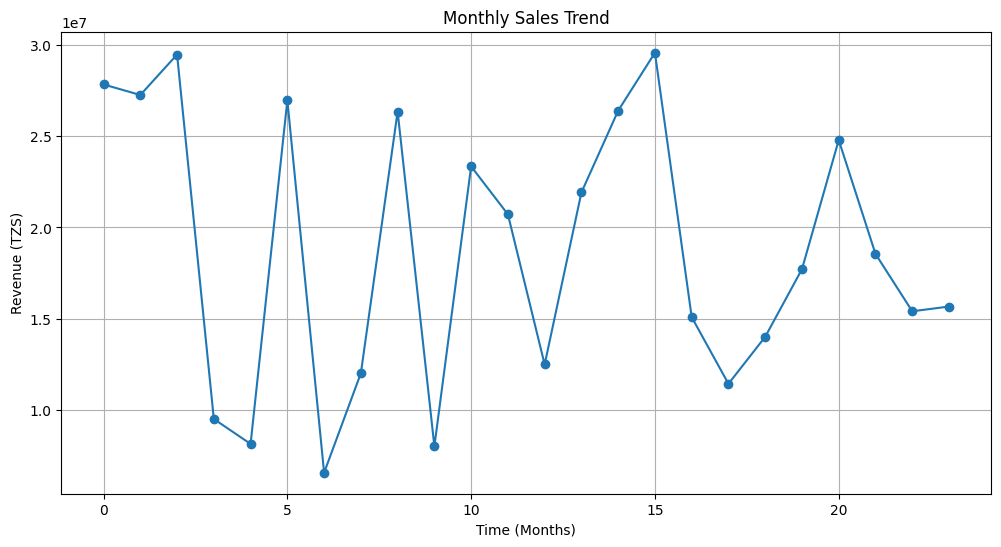

In [8]:
# Plot monthly sales trend

plt.figure(figsize=(12,6))

plt.plot(
    monthly_sales.index,
    monthly_sales['Revenue'],
    marker='o'
)

plt.title("Monthly Sales Trend")
plt.xlabel("Time (Months)")
plt.ylabel("Revenue (TZS)")
plt.grid(True)

plt.show()


In [9]:
# ============================================
# STEP 7: BEST SELLING PRODUCTS
# ============================================
# Identify products that generate most revenue.

product_sales = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False)

product_sales


,Revenue
Product,
TV,120650000
Laptop,82450000
Phone,54450000
Bed,46200000
Tablet,41600000
Sofa,41200000
Printer,38000000
Table,9960000
Router,9090000


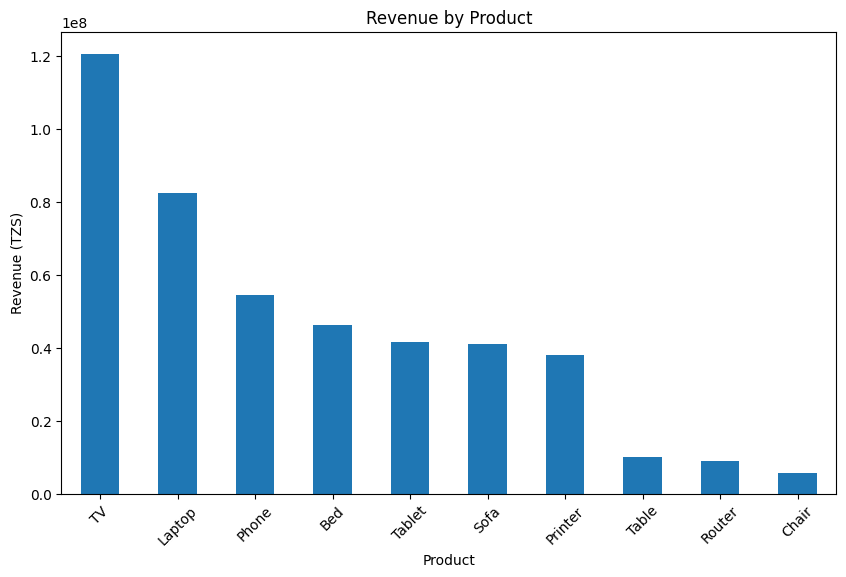

In [10]:
plt.figure(figsize=(10,6))

product_sales.plot(kind='bar')

plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue (TZS)")
plt.xticks(rotation=45)

plt.show()


In [11]:
# ============================================
# STEP 8: REGIONAL PERFORMANCE
# ============================================
# Evaluate which regions perform best.

region_sales = df.groupby('Region')['Revenue'].sum().sort_values(ascending=False)

region_sales


,Revenue
Region,
Mbeya,85110000
Tanga,84700000
Arusha,76160000
Morogoro,64210000
Mwanza,54670000
Dar,52380000
Dodoma,31950000


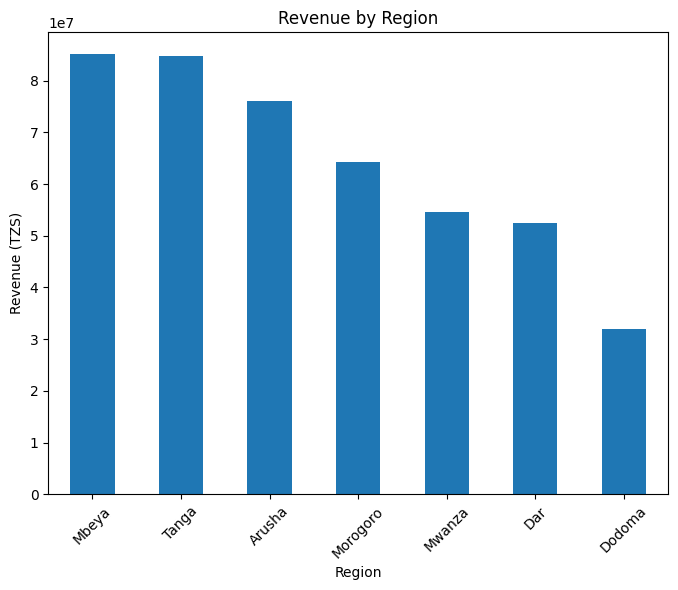

In [12]:
plt.figure(figsize=(8,6))

region_sales.plot(kind='bar')

plt.title("Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Revenue (TZS)")
plt.xticks(rotation=45)

plt.show()


In [13]:
# ============================================
# STEP 9: CATEGORY PERFORMANCE
# ============================================
# Compare Electronics vs Furniture.

category_sales = df.groupby('Category')['Revenue'].sum()

category_sales


,Revenue
Category,
Electronics,346240000
Furniture,102940000


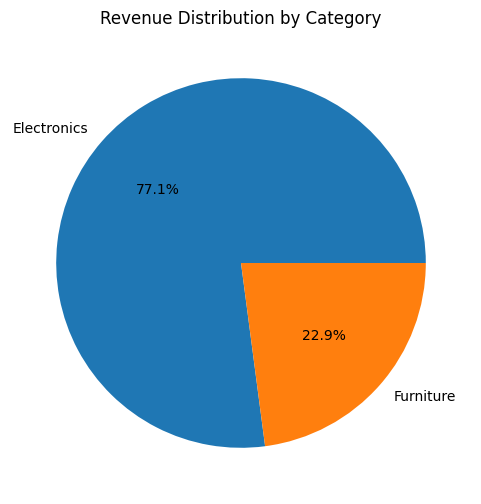

In [14]:
plt.figure(figsize=(6,6))

category_sales.plot(kind='pie', autopct='%1.1f%%')

plt.title("Revenue Distribution by Category")

plt.ylabel("")  # Remove default label

plt.show()


In [15]:
# ============================================
# STEP 10: TOP ORDERS
# ============================================
# Identify highest value transactions.

top_orders = df.sort_values('Revenue', ascending=False).head(10)

top_orders


,OrderID,Date,Product,Category,Region,Quantity,Price,Revenue,Year,Month,Month_Name
26,1027,2024-11-18,TV,Electronics,Arusha,10,950000,9500000,2024,11,November
4,1005,2025-09-08,TV,Electronics,Dar,9,950000,8550000,2025,9,September
66,1067,2025-04-04,TV,Electronics,Arusha,9,950000,8550000,2025,4,April
90,1091,2024-09-28,TV,Electronics,Arusha,9,950000,8550000,2024,9,September
140,1141,2025-04-29,TV,Electronics,Tanga,9,950000,8550000,2025,4,April
83,1084,2024-03-24,Laptop,Electronics,Mbeya,10,850000,8500000,2024,3,March
78,1079,2025-05-03,Laptop,Electronics,Dodoma,10,850000,8500000,2025,5,May
166,1167,2025-01-24,Laptop,Electronics,Mbeya,10,850000,8500000,2025,1,January
183,1184,2024-06-05,Laptop,Electronics,Arusha,10,850000,8500000,2024,6,June
180,1181,2024-02-23,Laptop,Electronics,Mwanza,9,850000,7650000,2024,2,February


In [16]:
# ============================================
# STEP 11: EXPORT CLEAN DATA
# ============================================
# Save cleaned dataset for future use.

df.to_csv("cleaned_sales_data.csv", index=False)

print("Cleaned data saved successfully.")


Cleaned data saved successfully.
